In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Part A: Data Cleaning & Exploratory Analysis.

1. Import full data set using Pandas:
   * Verify that the shape is: (864863, 74).

In [2]:
df = pd.read_csv('bottle.csv')

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_77367/3912374764.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


In [3]:
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print("Original dataset shape:", df.shape)

Original dataset shape: (864863, 74)


2. Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
   * Verify the shape is: (812174, 3).

In [5]:
df_clean = df[['T_degC', 'Salnty', 'STheta']].dropna()

In [6]:
print("Clean dataset shape:", df_clean.shape)

Clean dataset shape: (812174, 3)


3. Build the following plots using matplotlib: 

a) Scatter: Salnty (salinity of water) vs T_degC 

b) Scatter: STheta (density of water) vs T_degC.

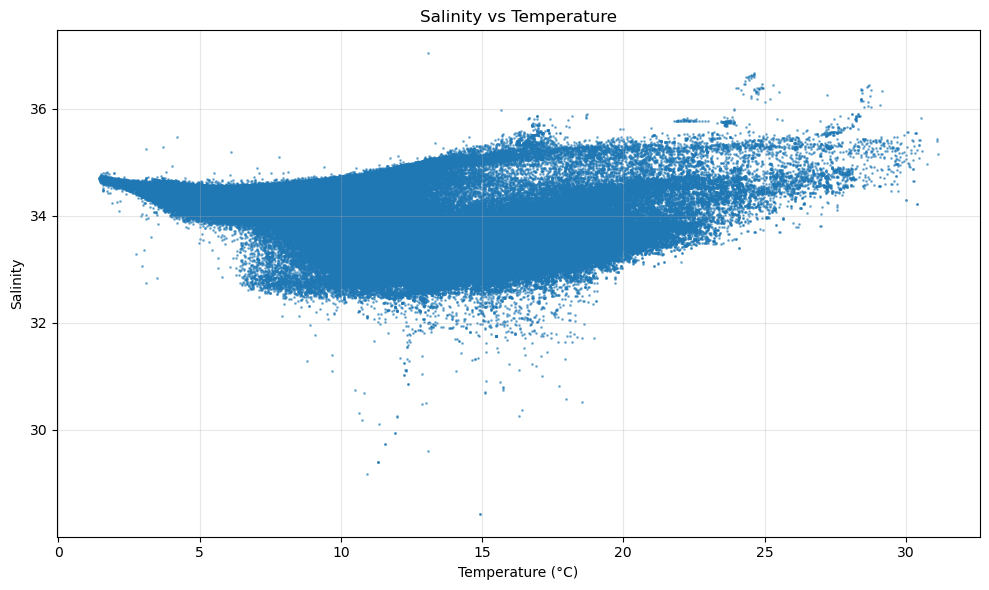

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['T_degC'], df_clean['Salnty'], alpha=0.5, s=1)
plt.title('Salinity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Salinity')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

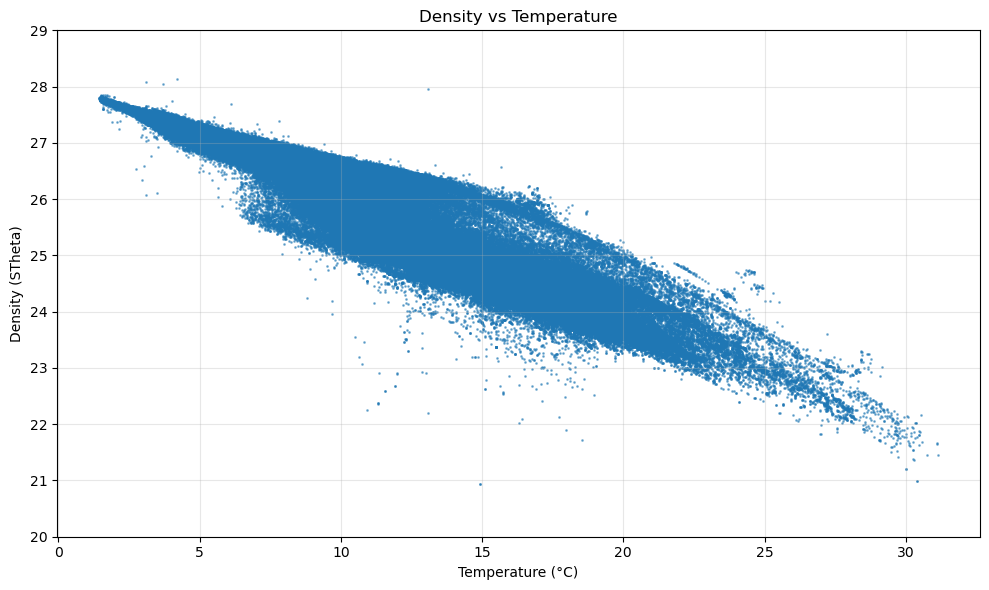

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['T_degC'], df_clean['STheta'], alpha=0.5, s=1)
plt.title('Density vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density (STheta)')
plt.ylim(20, 29)  # Adjust the y-axis limits as needed
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

4. Build the following plot using seaborn: 

a) Distribution of T_degC (hint: distplot will be helpful here).

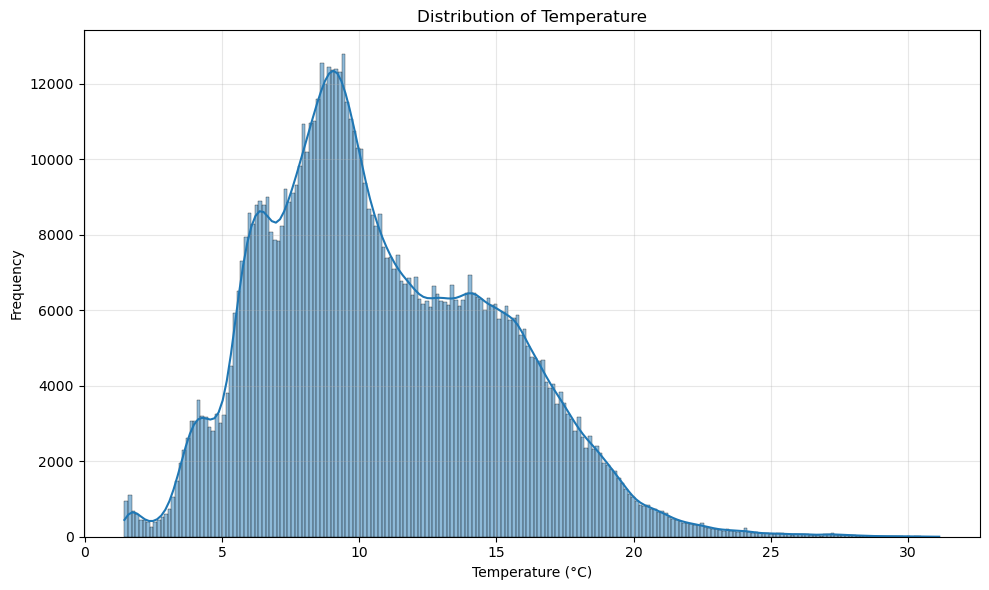

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['T_degC'], kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('temp_distribution.png', dpi=300)
plt.show()

5. Remove obvious outliers from step 3b:
   *  Shape for clean data will be: (812168, 3)
   * Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section.

In [19]:
# IQR for outlier detection
Q1 = df_clean['STheta'].quantile(0.25)
Q3 = df_clean['STheta'].quantile(0.75)
IQR = Q3 - Q1

# Bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers
df_no_outliers = df_clean[(df_clean['STheta'] >= lower_bound) & 
                          (df_clean['STheta'] <= upper_bound)]

print("Dataset shape after outlier removal:", df_no_outliers.shape)

Dataset shape after outlier removal: (811655, 3)


6. Plot 3b again – does it look better? Explain.

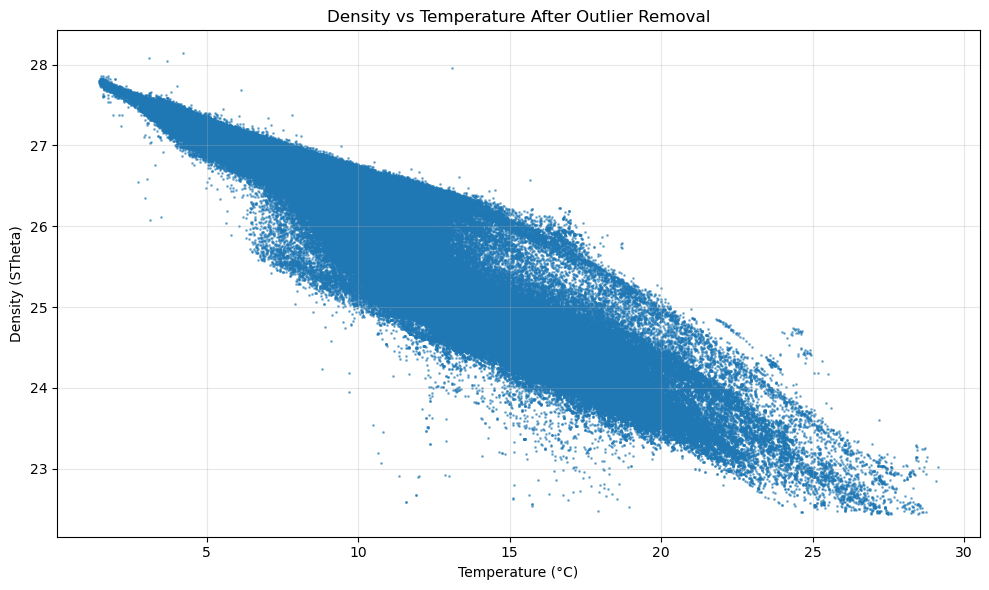

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['T_degC'], df_no_outliers['STheta'], alpha=0.5, s=1)
plt.title('Density vs Temperature After Outlier Removal')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density (STheta)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('density_vs_temp_after.png', dpi=300)
plt.show()

In the plot with outliers the y-axis extends down to 20 kg/m3, where there appears to be some isolated points at the bottom of the plot. 

In the plot after removing outliers the y-axis has a narrower range from 22.5-28 kg/m3 and the main data trend is more clearly visible and the relationship between temperature and density is better visualized.

The plot after removing the outliers looks better for several reasons:

- By removing extreme values, the visualization focuses on the range where most data points sre, allowing patterns to be more visible.

- The inverse relationship between temperature and water density is now more evident, as temperature increases, density decreases in a consistent pattern.

- You can now see what appears to be different water masses or layers in the ocean, shown by the bands of density at different temperature ranges.

The improvement demonstrates why outlier removal is an important step in oceanographic data analysis, as these extreme values can affect the relationships present in the data.

# Part B: Train & Test Split.

As we know, we must generate a training set for model building and a testing set for model validation. Feel free to perform these steps however you want, but please note that sklearn has a `train_test_split` class that is perfect for this type of work.


Our X matrix (features / independent variables) will be: [Salnty, STheta]

Our y matrix (target / dependent variable) will be: T_degC

Build out the following:
- X_train
- X_test
- y_train
- y_test

Make sure to add a seed (called random_state in train_test_split) so your split is reproducible.

In [22]:
# Feature matrix X and target variable
X = df_no_outliers[['Salnty', 'STheta']]  
y = df_no_outliers['T_degC']               

In [24]:
from sklearn.model_selection import train_test_split

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
print("Original dataset shape:", df_no_outliers.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original dataset shape: (811655, 3)
X_train shape: (649324, 2)
X_test shape: (162331, 2)
y_train shape: (649324,)
y_test shape: (162331,)


In [26]:
print("\nTraining set statistics:")
print("X_train['Salnty'] mean:", X_train['Salnty'].mean())
print("X_train['STheta'] mean:", X_train['STheta'].mean())
print("y_train mean:", y_train.mean())

print("\nTest set statistics:")
print("X_test['Salnty'] mean:", X_test['Salnty'].mean())
print("X_test['STheta'] mean:", X_test['STheta'].mean())
print("y_test mean:", y_test.mean())


Training set statistics:
X_train['Salnty'] mean: 33.84204449781619
X_train['STheta'] mean: 25.82028574012357
y_train mean: 10.836809147667418

Test set statistics:
X_test['Salnty'] mean: 33.841472472294264
X_test['STheta'] mean: 25.81937618033524
y_test mean: 10.838466417381769
